In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2017_jun_final.csv')

In [ ]:
#Прочитайте отриману таблицю, використовуючи метод head
df.head()

In [ ]:
#Визначте розмір таблиці за допомогою методу shape
df.shape

(8704, 25)

In [ ]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [ ]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
df.isnull().sum() / len(df) * 100

N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Специализация                       82.938879
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Университет                          4.113051
Еще.студент                          0.000000
Уровень.английского                  0.000000
Предметная.область                   2.562040
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

In [4]:
#Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
df_language = df['Язык.программирования']
df_cleaned = df.dropna(axis=1, how='any')
df_new = pd.concat([df_language, df_cleaned], axis=1)

In [ ]:
#Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
df_new.isnull().sum() / len(df) * 100

Язык.программирования               44.232537
N                                    0.000000
Должность                            0.000000
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Еще.студент                          0.000000
Уровень.английского                  0.000000
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64

In [5]:
#Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
df_new = df_new.dropna()

In [ ]:
#Визначте новий розмір таблиці за допомогою методу shape
df_new.shape

(4854, 20)

In [ ]:
df_new

In [15]:
#Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами,
# які вказали мову програмування Python
python_data = df_new[df_new['Язык.программирования'] == 'Python']

In [16]:
#Визначте розмір таблиці python_data за допомогою методу shape
python_data.shape

(207, 20)

In [17]:
#Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
grouped_by_position = python_data.groupby('Должность')

In [18]:
#Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада",
# виконайте агрегацію даних за допомогою методу agg
average_by_position = python_data.groupby('Должность')['Зарплата.в.месяц'].mean().reset_index()
average_by_position

,Должность,Зарплата.в.месяц
0,Junior Software Engineer,560.841270
1,Senior Software Engineer,3387.096774
2,Software Engineer,1799.070000
3,System Architect,4000.000000
4,Technical Lead,3165.909091


In [19]:
# і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
aggregated_data = python_data.groupby('Должность')['Зарплата.в.месяц'].agg(['min', 'max']).reset_index()
aggregated_data

,Должность,min,max
0,Junior Software Engineer,100,1250
1,Senior Software Engineer,1300,9200
2,Software Engineer,500,5400
3,System Architect,3000,5000
4,Technical Lead,1425,6200


In [20]:
#Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць.
# Використовуйте її для методу apply та створіть новий стовпчик "avg"
def fill_avg_salary(row):
    return python_data[python_data['Должность'] == row['Должность']]['Зарплата.в.месяц'].mean()
aggregated_data['avg'] = aggregated_data.apply(fill_avg_salary, axis=1)
aggregated_data

,Должность,min,max,avg
0,Junior Software Engineer,100,1250,560.841270
1,Senior Software Engineer,1300,9200,3387.096774
2,Software Engineer,500,5400,1799.070000
3,System Architect,3000,5000,4000.000000
4,Technical Lead,1425,6200,3165.909091


In [21]:
#Створіть описову статистику за допомогою методу describe для нового стовпчика.
aggregated_data['avg'].describe()

count       5.000000
mean     2582.583427
std      1387.255829
min       560.841270
25%      1799.070000
50%      3165.909091
75%      3387.096774
max      4000.000000
Name: avg, dtype: float64

In [22]:
#Збережіть отриману таблицю в CSV файл
aggregated_data.to_csv("python_salary.csv", index=False)

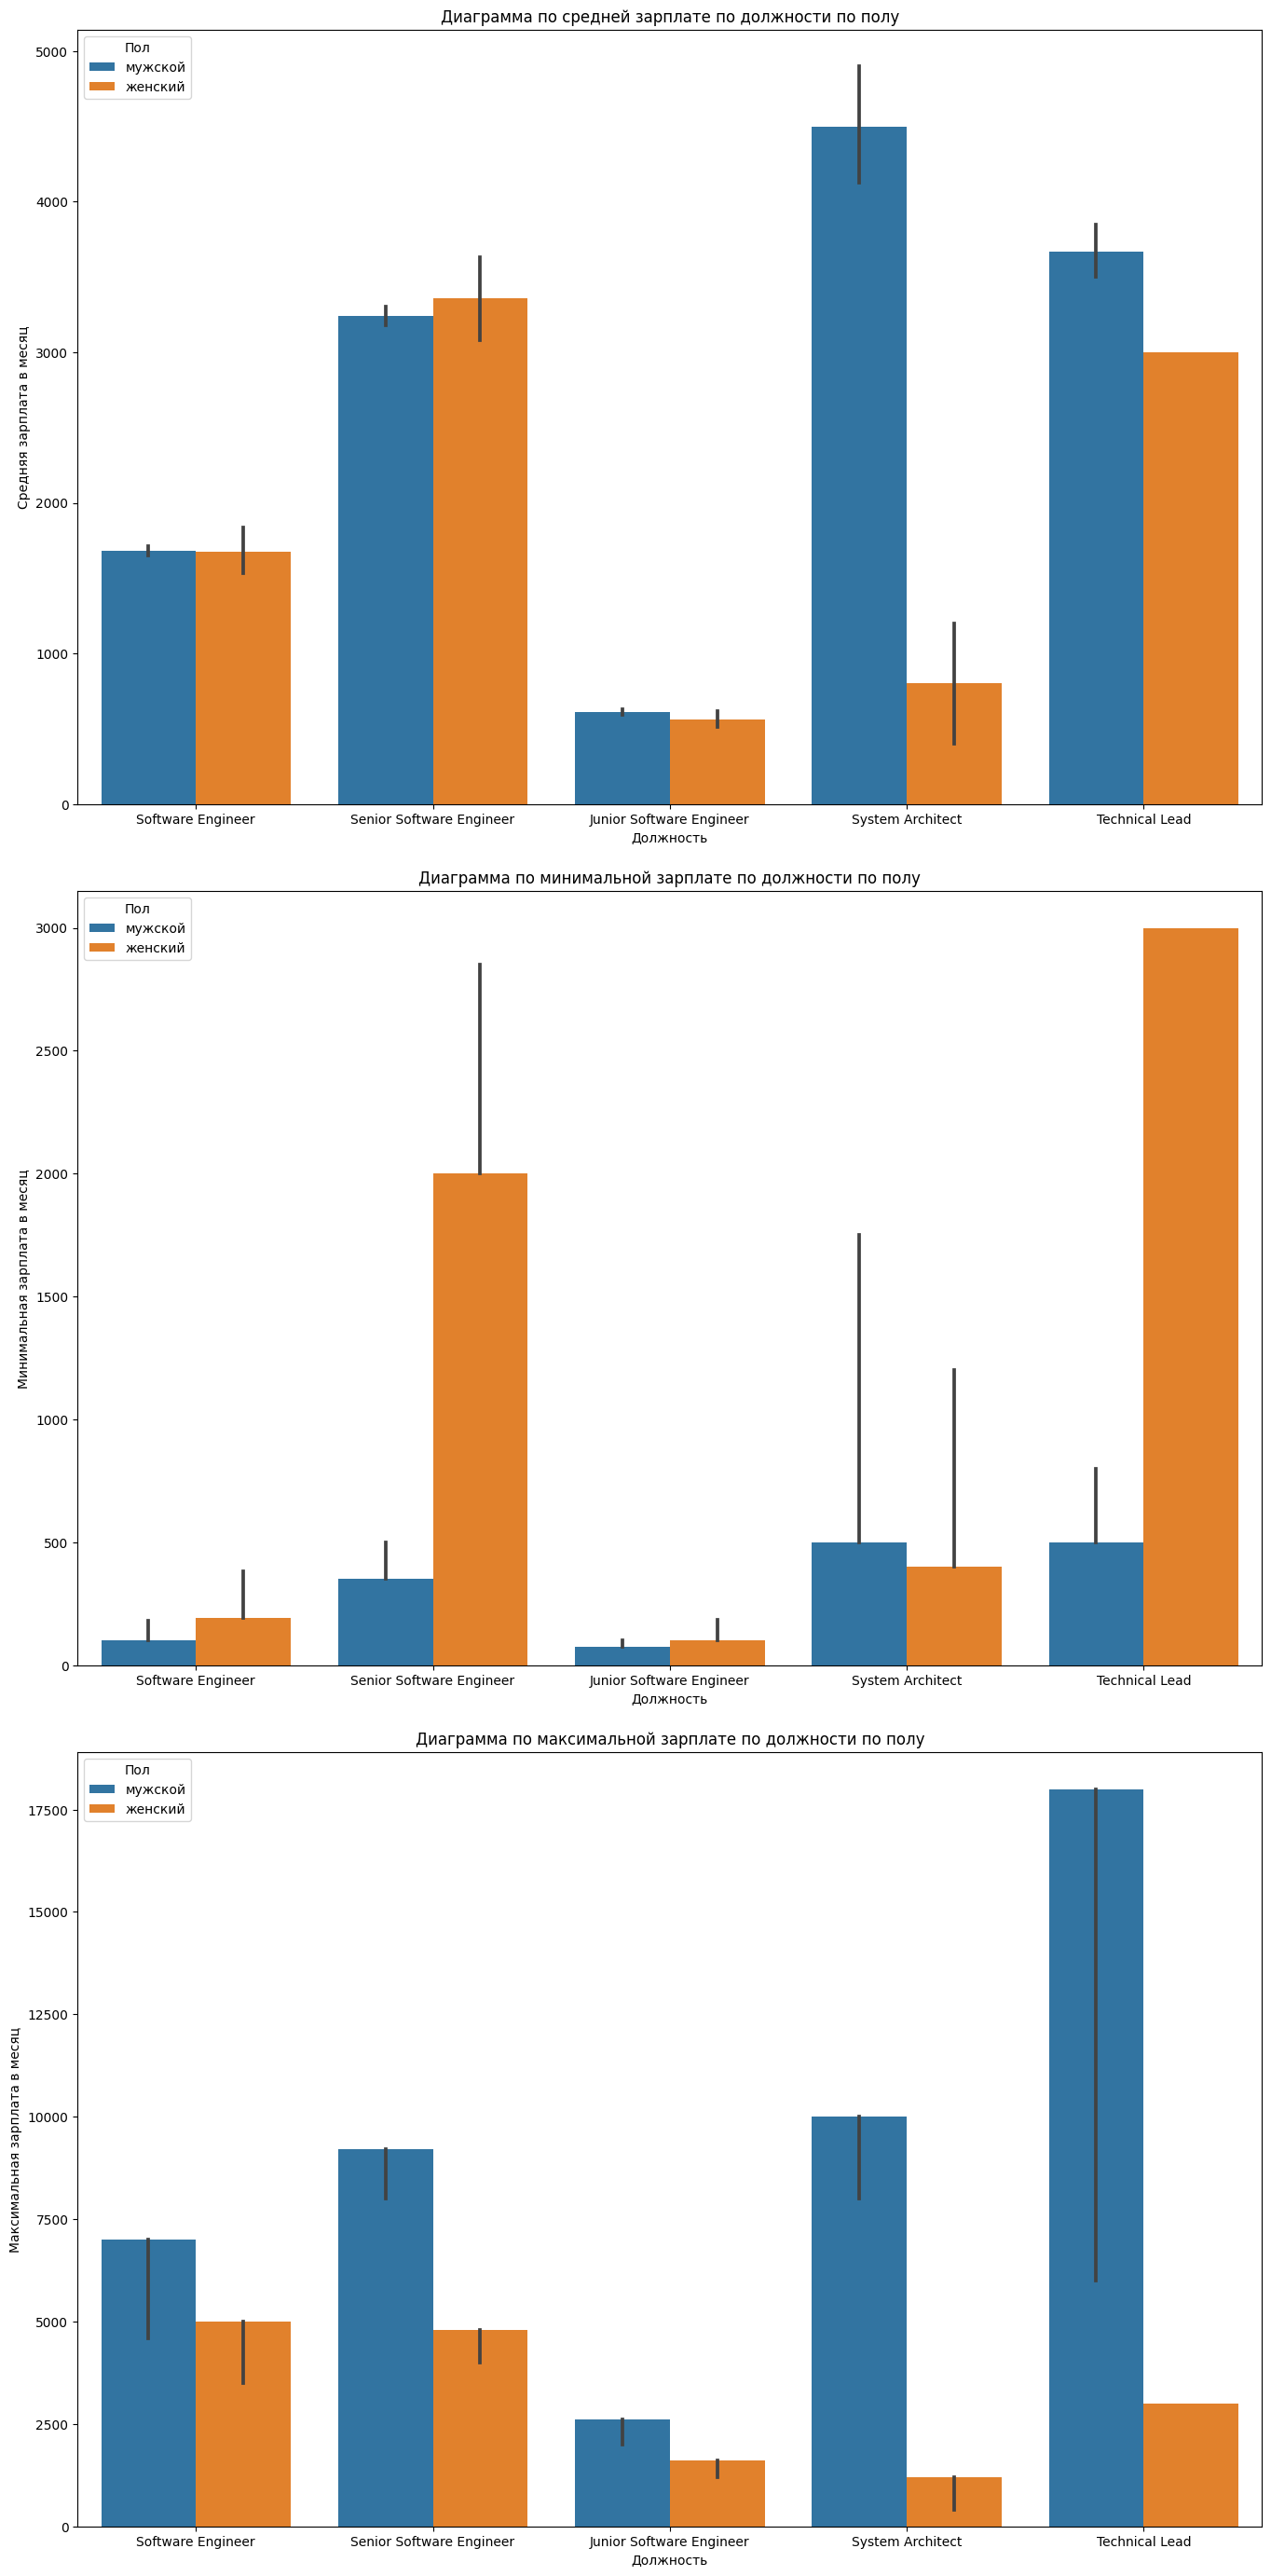

In [ ]:
#Построение диаграмм по должностям, зарплатам и полам
grouped_df = df_new.groupby(['Должность', 'Пол']).size().unstack()
filtered_positions = grouped_df[(grouped_df['женский'] > 0) & (grouped_df['мужской'] > 0)].index
new_df_gender = df_new[df_new['Должность'].isin(filtered_positions)]

fig, axes = plt.subplots(nrows=3, figsize=(14, 28))

sns.barplot(x='Должность', y='Зарплата.в.месяц', hue='Пол', data=new_df_gender, estimator='mean', ax=axes[0])
axes[0].legend(title='Пол',loc='upper left')
axes[0].set_xlabel('Должность')
axes[0].set_ylabel('Средняя зарплата в месяц')
axes[0].set_title('Диаграмма по средней зарплате по должности по полу')

sns.barplot(x='Должность', y='Зарплата.в.месяц', hue='Пол', data=new_df_gender, estimator='min', ax=axes[1])

axes[1].legend(title='Пол',loc='upper left')
axes[1].set_xlabel('Должность')
axes[1].set_ylabel('Минимальная зарплата в месяц')
axes[1].set_title('Диаграмма по минимальной зарплате по должности по полу')

sns.barplot(x='Должность', y='Зарплата.в.месяц', hue='Пол', data=new_df_gender, estimator='max', ax=axes[2])

axes[2].legend(title='Пол', loc='upper left')
axes[2].set_xlabel('Должность')
axes[2].set_ylabel('Максимальная зарплата в месяц')
axes[2].set_title('Диаграмма по максимальной зарплате по должности по полу')

plt.tight_layout(pad=2)
plt.show()

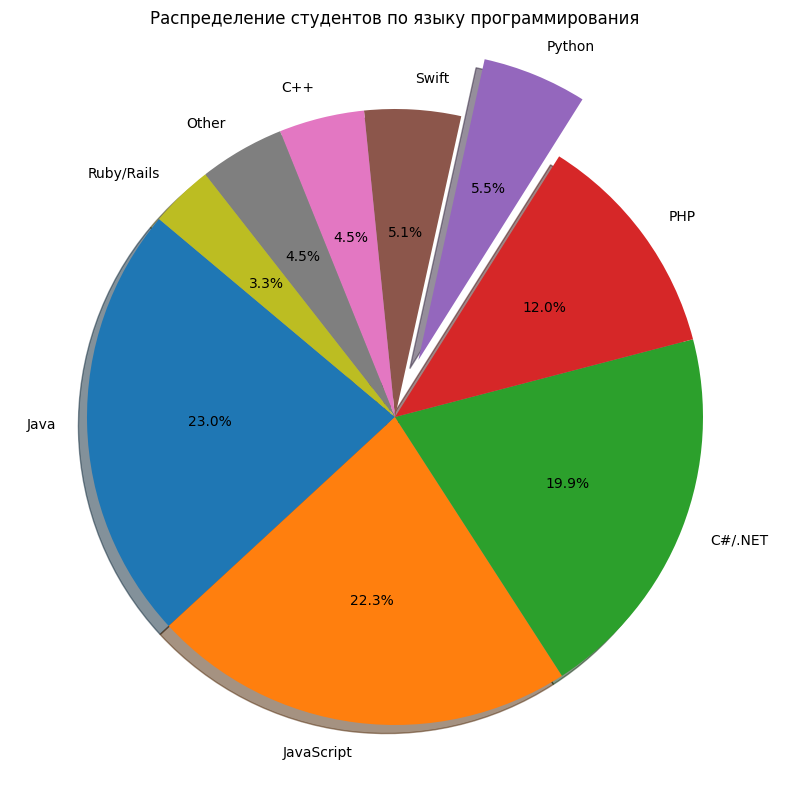

In [ ]:
#Построение диаграммы распределения студентов по языкам программирования

df_student = df_new[df_new['Еще.студент']==True].copy()
grouped_data = df_student.groupby('Язык.программирования').size()
grouped_data_percent = grouped_data / len(df_student) * 100

threshold = 2
small_languages = grouped_data_percent[grouped_data_percent < threshold].index
df_student['Язык.программирования'] = df_student['Язык.программирования'].apply(lambda x: 'Other' if x in small_languages else x)
grouped_data = df_student.groupby('Язык.программирования').size()
grouped_data_percent = grouped_data / len(df_student) * 100

plt.figure(figsize=(10, 10))
explode = [0.2 if lang == 'Other' else 0 for lang in grouped_data_percent.index]
grouped_data_percent = grouped_data_percent.sort_values(ascending=False)
plt.pie(grouped_data_percent, labels=grouped_data_percent.index, autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)
plt.title('Распределение студентов по языку программирования')
plt.show()


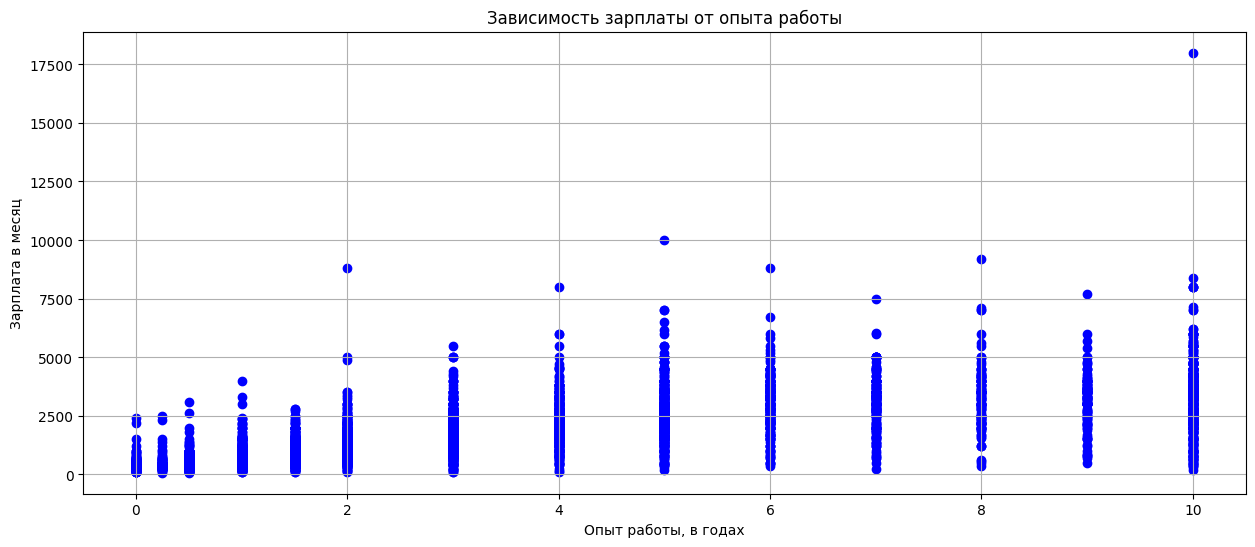

In [59]:
#Точечный график зависимости зарплаты от опыта работы
plt.figure(figsize=(15, 6))
plt.scatter(df_new['exp'], df_new['Зарплата.в.месяц'], color='blue')
plt.title('Зависимость зарплаты от опыта работы')
plt.xlabel('Опыт работы, в годах')
plt.ylabel('Зарплата в месяц')
plt.grid(True)
plt.show()

# Новый раздел